## Step 1: Read in Titanic.csv and observe a few samples, some features are categorical and others are numerical. Take a random 70% samples for training and the rest 30% for test.


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from IPython.display import Image
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [9]:
df = pd.read_csv('Titanic.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [10]:
df = df[['pclass', 'sex', 'age', 'sibsp', 'survived']]
df['pclass'] = df['pclass'].map({'1st': 1, '2nd': 2, '3rd':3})
df['sex'] = df['sex'].map({'male':0, 'female':1})
df['age'].fillna((df['age'].mean()), inplace=True)
df = df.dropna()
df.head()

,pclass,sex,age,sibsp,survived
0,1,1,29.0000,0,1
1,1,0,0.9167,1,1
2,1,1,2.0000,1,0
3,1,0,30.0000,1,0
4,1,1,25.0000,1,0


In [11]:
X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Classification: \n\n ", classification_report(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))

Classification: 

                precision    recall  f1-score   support

           0       0.77      0.84      0.80       245
           1       0.69      0.59      0.63       148

    accuracy                           0.74       393
   macro avg       0.73      0.71      0.72       393
weighted avg       0.74      0.74      0.74       393

Accuracy:  0.7430025445292621


## Step 2: Fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in your code. You may see a tree similar to (not necessarily the exact same as) this one: 

In [18]:
clf = tree.DecisionTreeClassifier()

In [19]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

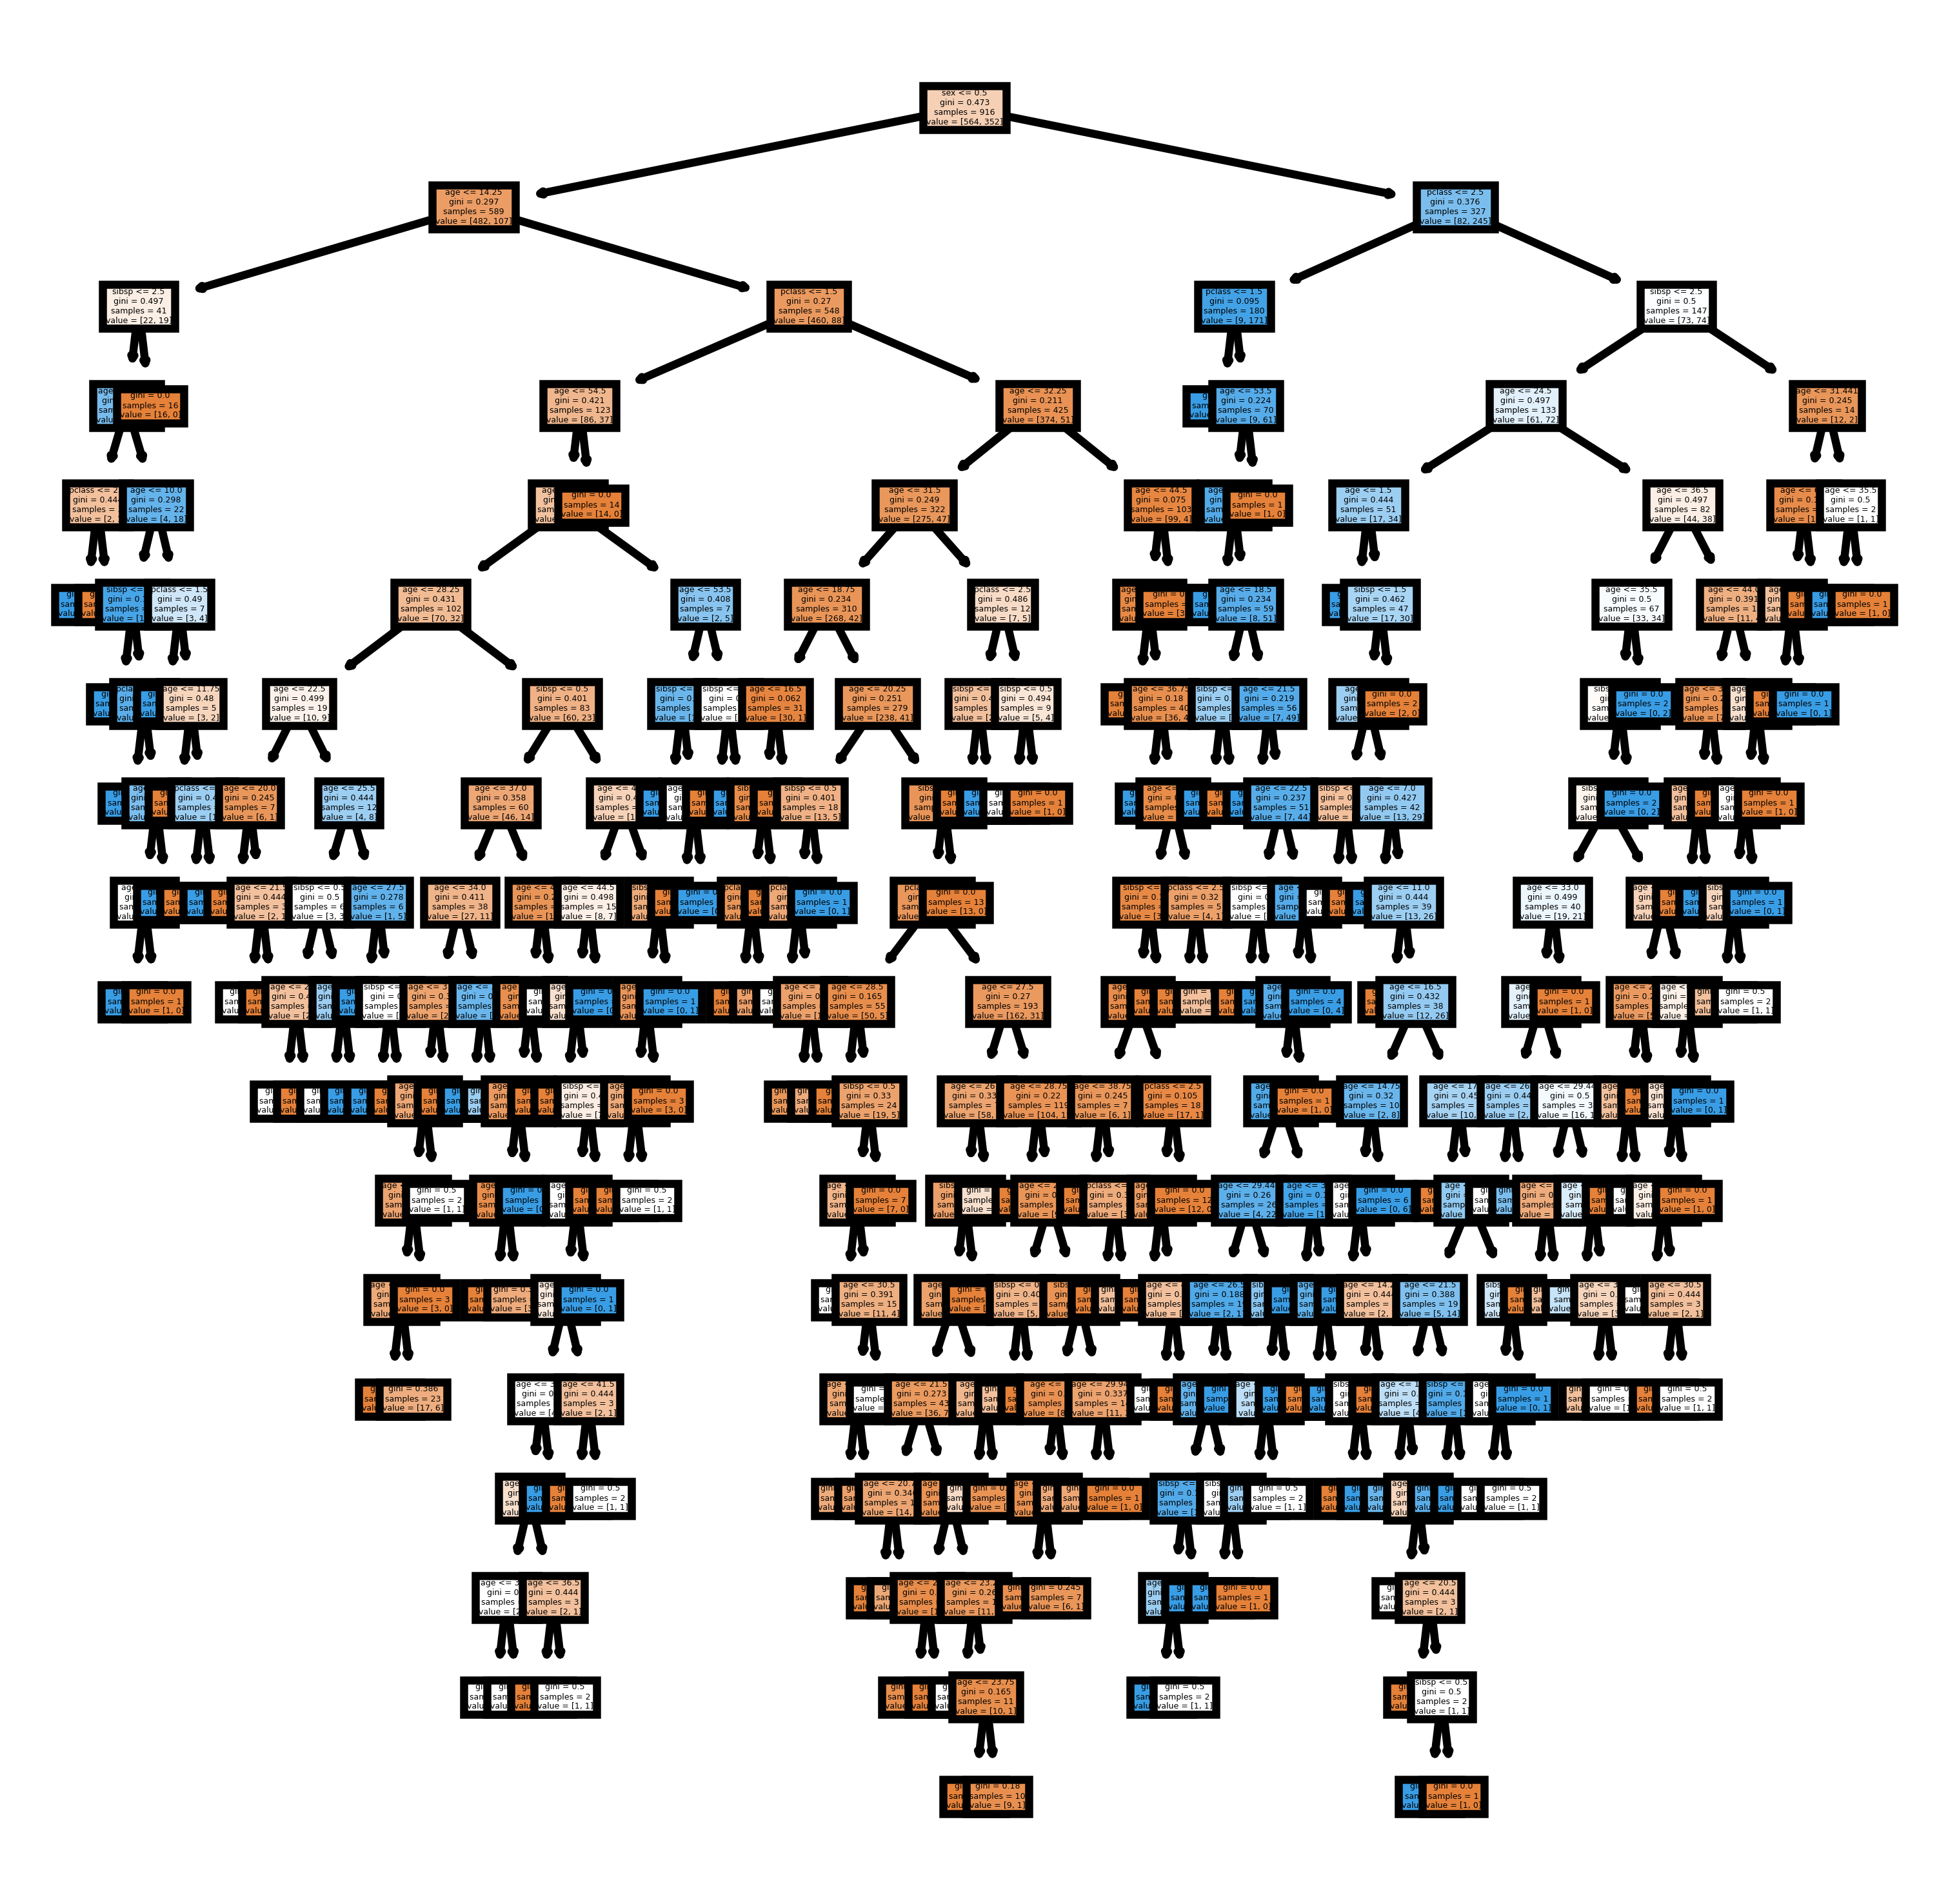

In [20]:
fig, axer = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 900)
plot_tree = tree.plot_tree(clf, feature_names = ["pclass","sex","age","sibsp"], filled = True)


## Step 3: Use cross‐validation to find the best parameter to prune the tree. You should be able to plot a graph with the ‘tree size’ as the x-axis and ‘number of misclassification’ as the Y-axis. You may have a plot similar to (not necessarily the exact same as) below:

In [21]:
criterion = ['entropy']
splitter = ['best']
max_depth = [None, 1, 2, 3, 4]
min_samples_split = [2, 4, 6]
min_samples_leaf = [1, 3, 5]
max_leaf_nodes = [None, 3, 5]
min_impurity_decrease = [0, 0.2, 0.3, 0.5]

param_grid = {
    'criterion'               : criterion,
    'splitter'                : splitter,
    'max_depth'               : max_depth,
    'min_samples_split'       : min_samples_split,
    'min_samples_leaf'        : min_samples_leaf,
    'max_leaf_nodes'          : max_leaf_nodes,
    'min_impurity_decrease'   : min_impurity_decrease
}


gsearch = GridSearchCV(clf, param_grid, verbose=1)
gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [None, 1, 2, 3, 4],
                         'max_leaf_nodes': [None, 3, 5],
                         'min_impurity_decrease': [0, 0.2, 0.3, 0.5],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6], 'splitter': ['best']},
             verbose=1)

In [22]:
gsearch.best_score_

0.8045972915181754

In [23]:
gsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'best'}

In [24]:
clf_best = tree.DecisionTreeClassifier(criterion = 'entropy',
                                        max_depth = 4,
                                        max_leaf_nodes = None,
                                         min_impurity_decrease = 0,
                                        min_samples_leaf = 3,
                                         min_samples_split = 2,
                                         splitter = 'best')
clf_best.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4,
                       min_impurity_decrease=0, min_samples_leaf=3)

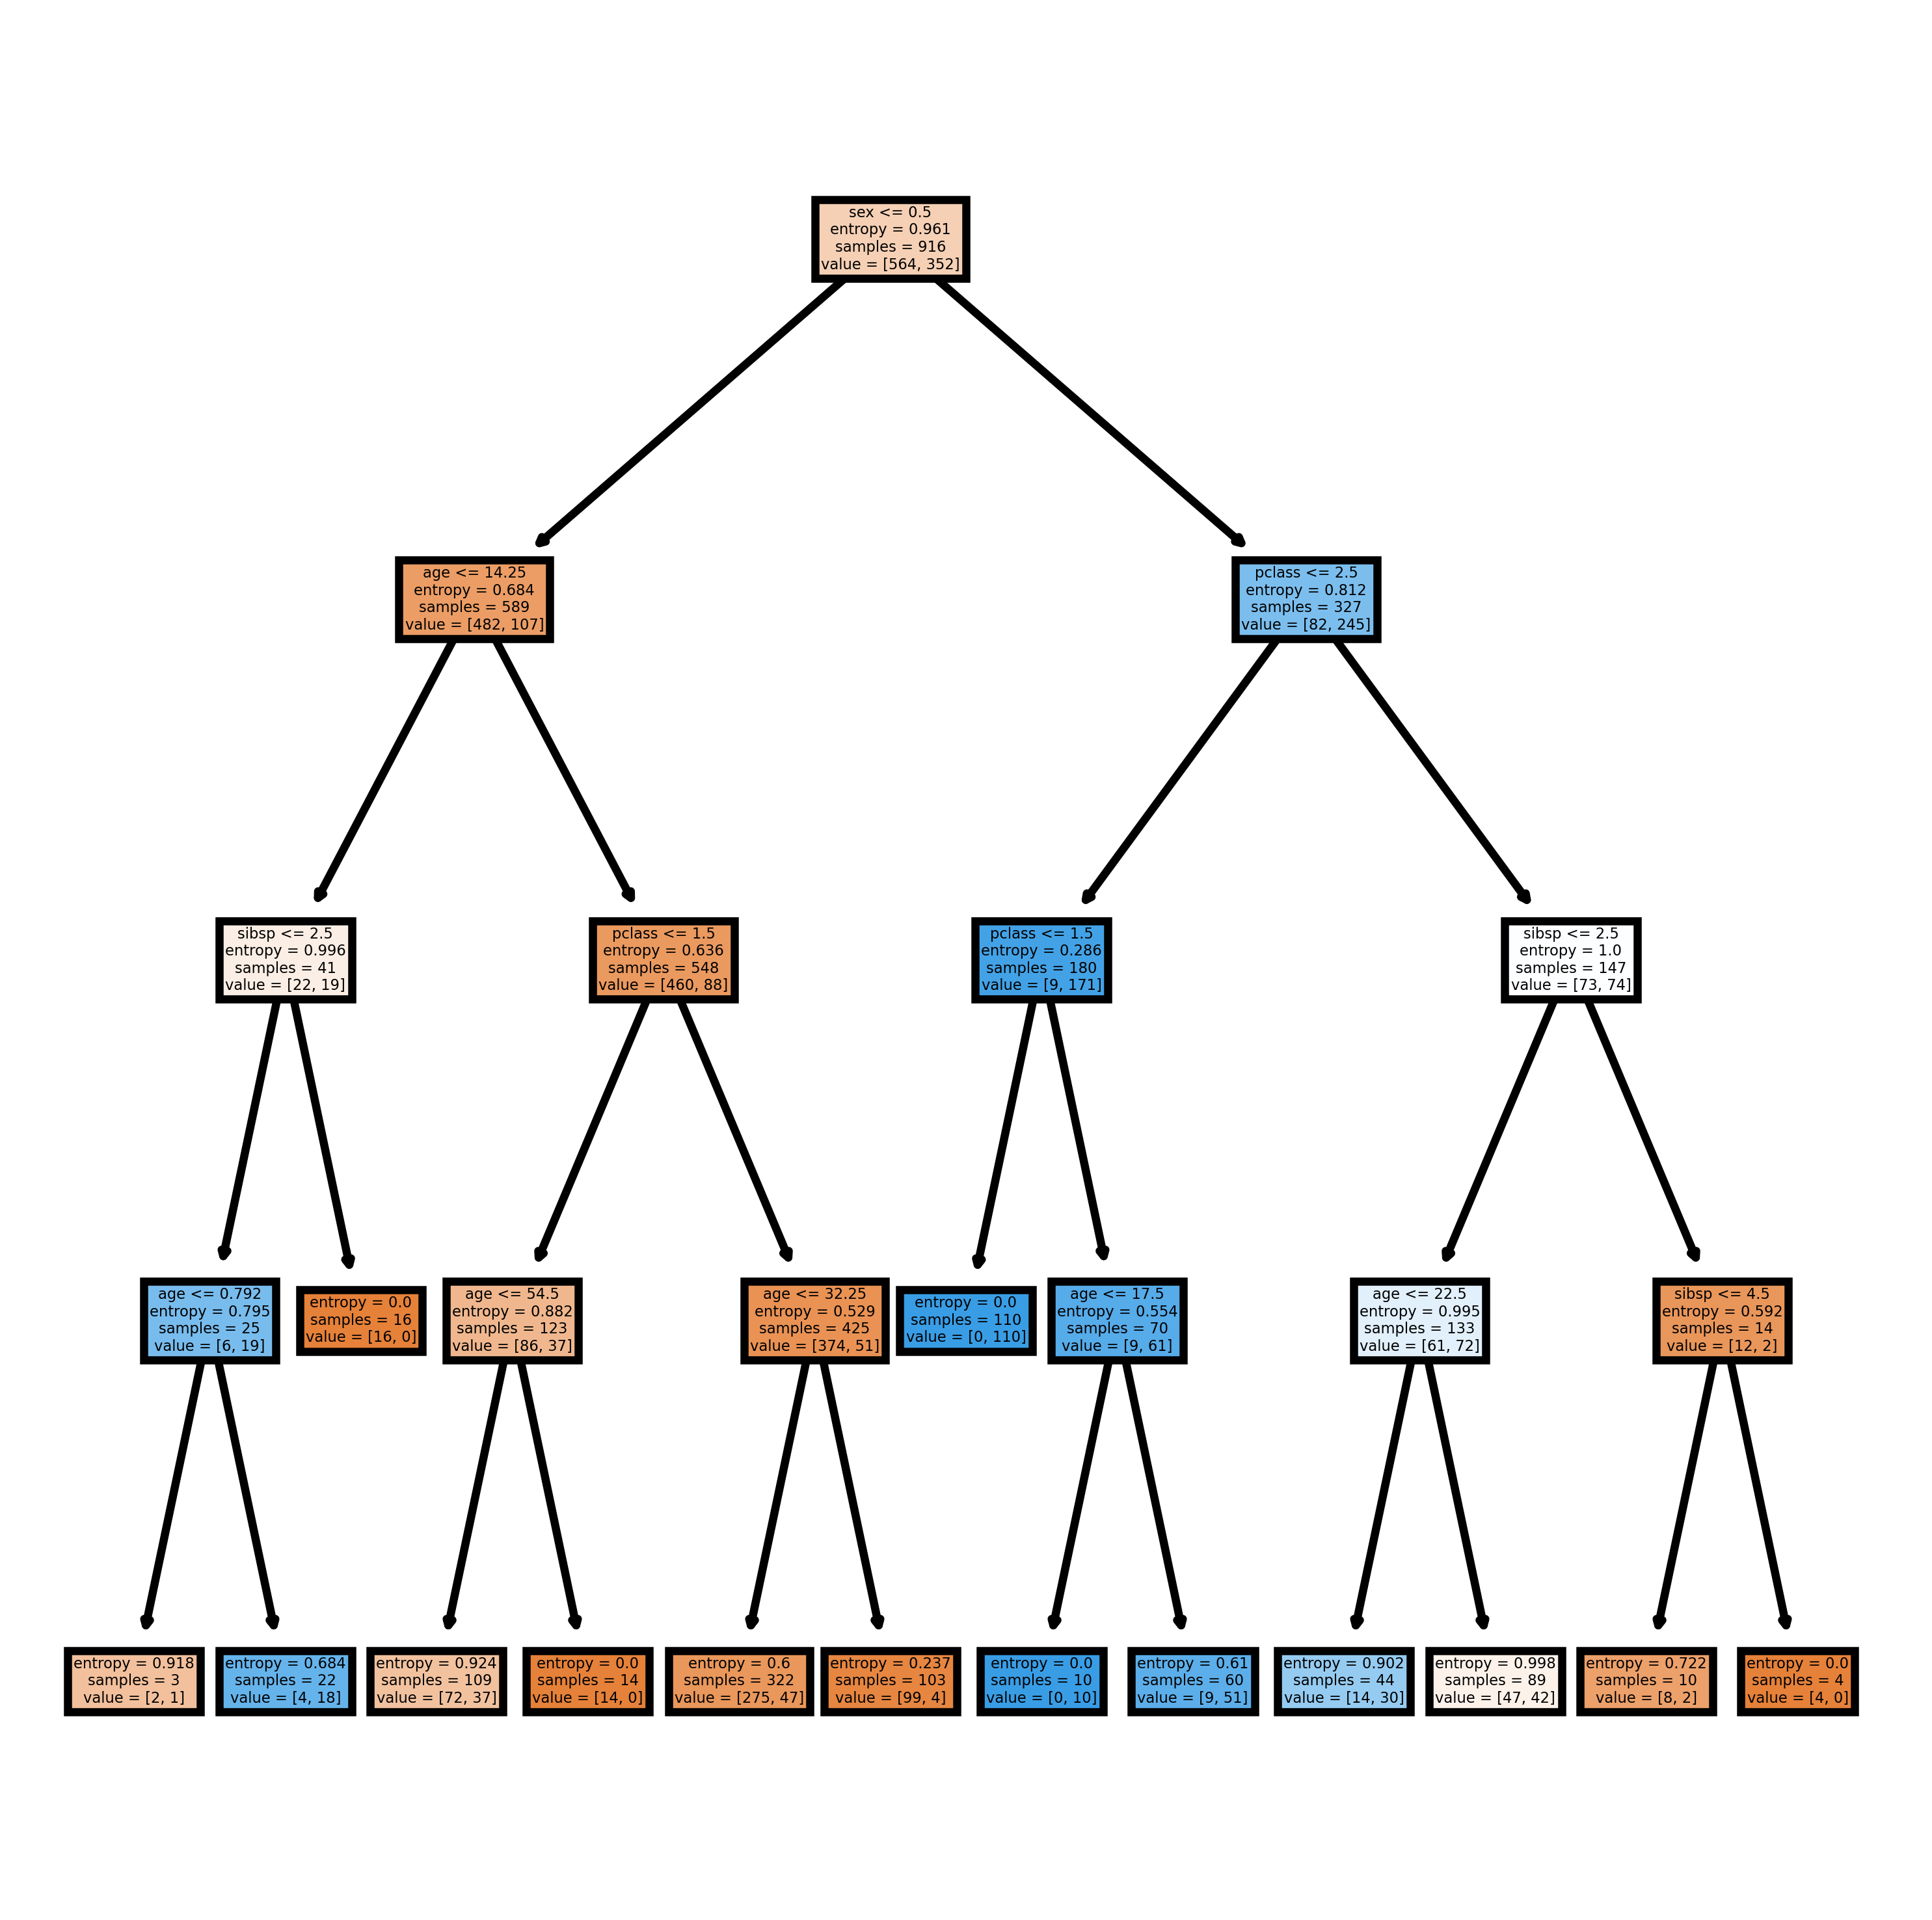

In [25]:
fig, axer = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 900)
plot_tree = tree.plot_tree(clf_best, feature_names = ["pclass","sex","age","sibsp"], filled = True)

## Step 4: Find the tree size that yields a minimum number of misclassifications. Choose the optimal tree size to prune the tree and plot the pruned tree (which shall be smaller than the tree you obtained in Step 2). Report the accuracy of pruned tree on the test set for the following: percent survivors correctly predicted (on test set) percent fatalities correctly predicted (on test set)


In [26]:
y_predict = clf_best.predict(X_test)

In [27]:
confusion_matrix(y_test, y_predict)

array([[220,  25],
       [ 67,  81]])

In [28]:
survivor = 70 / 100
survivor

0.7

In [37]:
fatalities = 220 / (220 + 25)
fatalities

0.8979591836734694

In [30]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       245
           1       0.76      0.55      0.64       148

    accuracy                           0.77       393
   macro avg       0.77      0.72      0.73       393
weighted avg       0.77      0.77      0.76       393



## Step 5: Use the RandomForestClassifier() function to train a random forest using the optimal tree size you found in Step 4. You can set n_estimators as 50. Report the accuracy of random forest on the test set for the following: percent survivors correctly predicted (on test set) percent fatalities correctly predicted (on test set)


In [33]:
R = RandomForestClassifier(max_leaf_nodes = None, n_estimators = 50 )

In [34]:
R.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [35]:
R_predict = R.predict(X_test)

In [36]:
confusion_matrix(y_test, R_predict)

array([[201,  44],
       [ 50,  98]])

In [38]:
survivor = 70 / 100
survivor

0.7

In [39]:
fatalities = 201 / (201 + 44)
fatalities

0.8204081632653061

In [40]:
print(classification_report(y_test, R_predict))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       245
           1       0.69      0.66      0.68       148

    accuracy                           0.76       393
   macro avg       0.75      0.74      0.74       393
weighted avg       0.76      0.76      0.76       393

